In [1]:
import argparse
import numpy as np
from PIL import Image

%matplotlib notebook
import matplotlib.pyplot as plt

Image.MAX_IMAGE_PIXELS = 11135877120


In [2]:
imageFile='../image1.tif'
saveFile='image1'
#Io=240
Io = 255
alpha=1
beta=0.15

img = np.array(Image.open(imageFile))
    

In [3]:
# Haematoxylin, Red, DAB reference (where Red is Alkaline Phosphatase) - OD matrix
HRDref = np.array([[0.651, 0.185, 0.269],
                   [0.701, 0.78, 0.568],
                   [0.29, 0.598, 0.778]])
    

        
maxCRef = np.array([0.7, 1.0308, 0.5])
    
# define height and width of image
h, w, c = img.shape
    


In [4]:
img[1,1:10,:]

array([[213, 200, 192],
       [214, 204, 194],
       [212, 202, 190],
       [214, 204, 192],
       [210, 202, 191],
       [200, 196, 185],
       [199, 198, 193],
       [199, 204, 200],
       [189, 198, 197]], dtype=uint8)

In [5]:
# reshape image
img = img.reshape((-1,3))


In [6]:
img[:,1].size

7918464

<IPython.core.display.Javascript object>


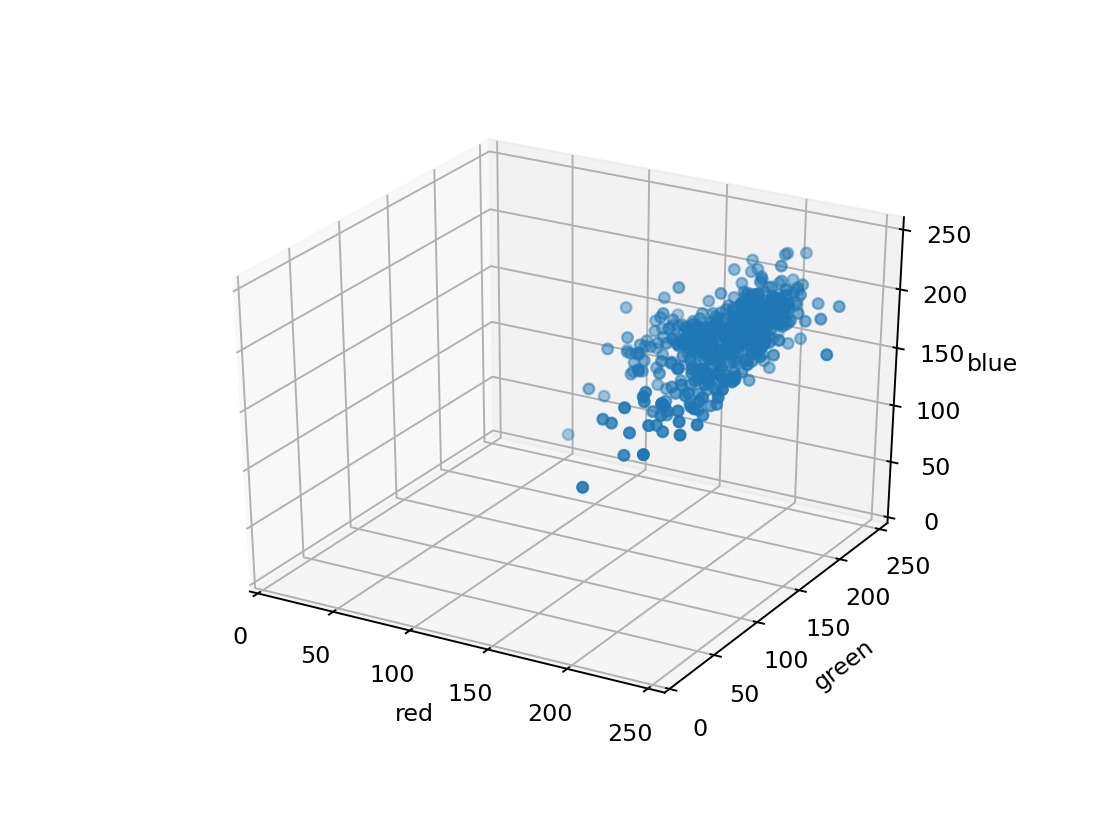

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(img[1:6000000:10000,0], img[1:6000000:10000,1], img[1:6000000:10000,2], zdir='z', s=20, c=None, depthshade=True)

ax.set(xlim=(0, 255), ylim=(0,255), zlim=(0,255))

ax.set_xlabel("red")
ax.set_ylabel("green")
ax.set_zlabel("blue")

plt.show()


In [8]:
# calculate optical density
OD = -np.log((img.astype(np.float)+1)/Io)

beta = 0.15

# remove transparent pixels
ODhat = OD[~np.any(OD<beta, axis=1)]

# compute eigenvectors
covariance = np.cov(ODhat.T)
eigvals, eigvecs = np.linalg.eigh(covariance)

#eigvecs *= -1
print("EIGENVALS = " + str(eigvals))

print("DYE VECTORS 0 = " + str(eigvecs[:, 0]))
print("DYE VECTORS 1 = " + str(eigvecs[:, 1]))
print("DYE VECTORS 2 = " + str(eigvecs[:, 2]))


EIGENVALS = [0.00151349 0.0060702  0.03371997]
DYE VECTORS 0 = [ 0.21258335 -0.57735049  0.78833668]
DYE VECTORS 1 = [-0.93476286  0.11486425  0.33619132]
DYE VECTORS 2 = [-0.28465193 -0.80837653 -0.51526757]


<IPython.core.display.Javascript object>


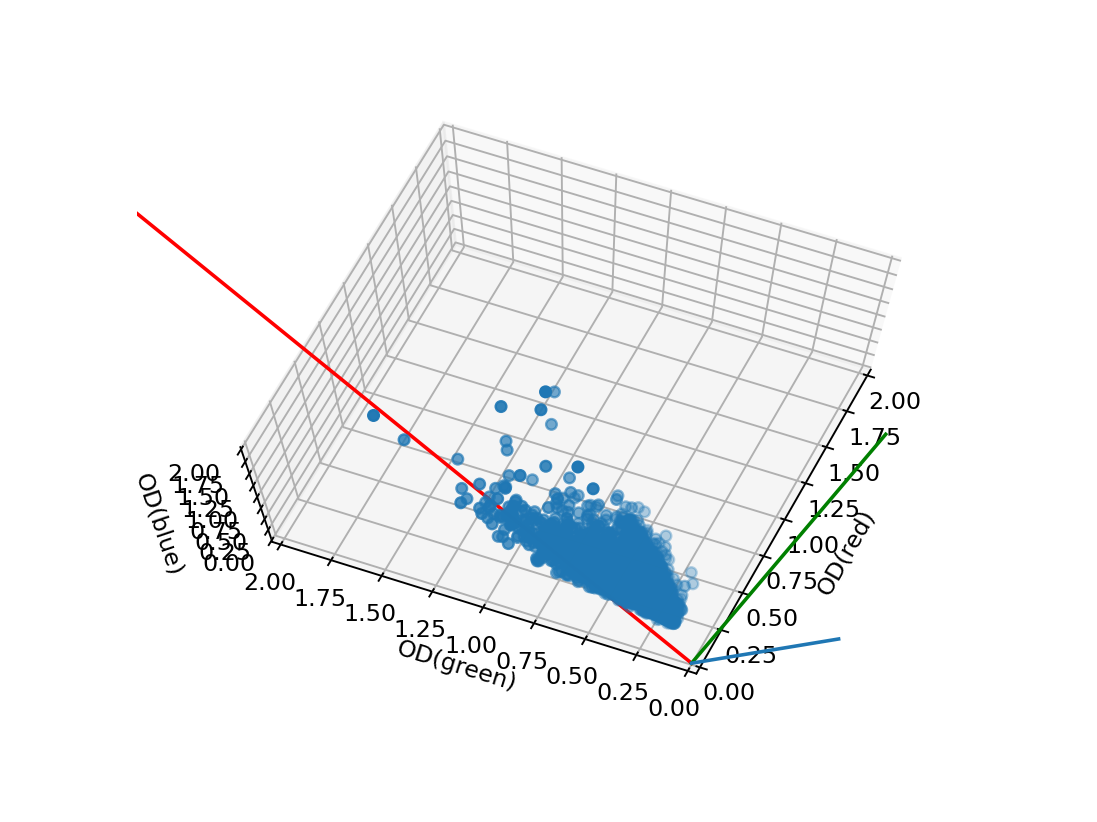

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ODhat[1:6000000:1000,0], ODhat[1:6000000:1000,1], ODhat[1:6000000:1000,2], zdir='z', s=20, c=None, depthshade=True)

ax.set(xlim=(0.0, 2.0), ylim=(0.0, 2.0), zlim=(0.0, 2.0))

ax.set_xlabel("OD(red)")
ax.set_ylabel("OD(green)")
ax.set_zlabel("OD(blue)")

ax.plot([0.0, -eigvecs[0,2]*4], [0.0, -eigvecs[1,2]*4],[0.0, -eigvecs[2,2]*4],'r-')

ax.plot([0.0, -eigvecs[0,1]*2], [0.0, -eigvecs[1,1]*2],[0.0, -eigvecs[2,1]*2],'g-')

ax.plot([0.0, eigvecs[0,0]], [0.0, eigvecs[1,0]],[0.0, eigvecs[2,0]])


plt.show()

In [22]:
#project on the plane spanned by the eigenvectors corresponding to the two 
# largest eigenvalues    
That = ODhat.dot(eigvecs[:,1:3])

phi = np.arctan2(That[:,1],That[:,0])

minPhi = np.percentile(phi, alpha)
maxPhi = np.percentile(phi, 100-alpha)







In [31]:
#project on the plane spanned by the eigenvectors corresponding to the two 
# largest eigenvalues    
That2 = ODhat.dot(eigvecs[:,(0,2)])

phi2 = np.arctan2(That2[:,1],That2[:,0])

minPhi2 = np.percentile(phi2, alpha)
maxPhi2 = np.percentile(phi2, 100-alpha)



In [32]:
minPhi2/(2*np.pi)*360.0, maxPhi2/(2*np.pi)*360.0

(-88.74729488241152, -68.02255133819352)

In [33]:
vMin2 = eigvecs[:,(0,2)].dot(np.array([(np.cos(minPhi2), np.sin(minPhi2))]).T)
vMax2 = eigvecs[:,(0,2)].dot(np.array([(np.cos(maxPhi2), np.sin(maxPhi2))]).T)

<IPython.core.display.Javascript object>


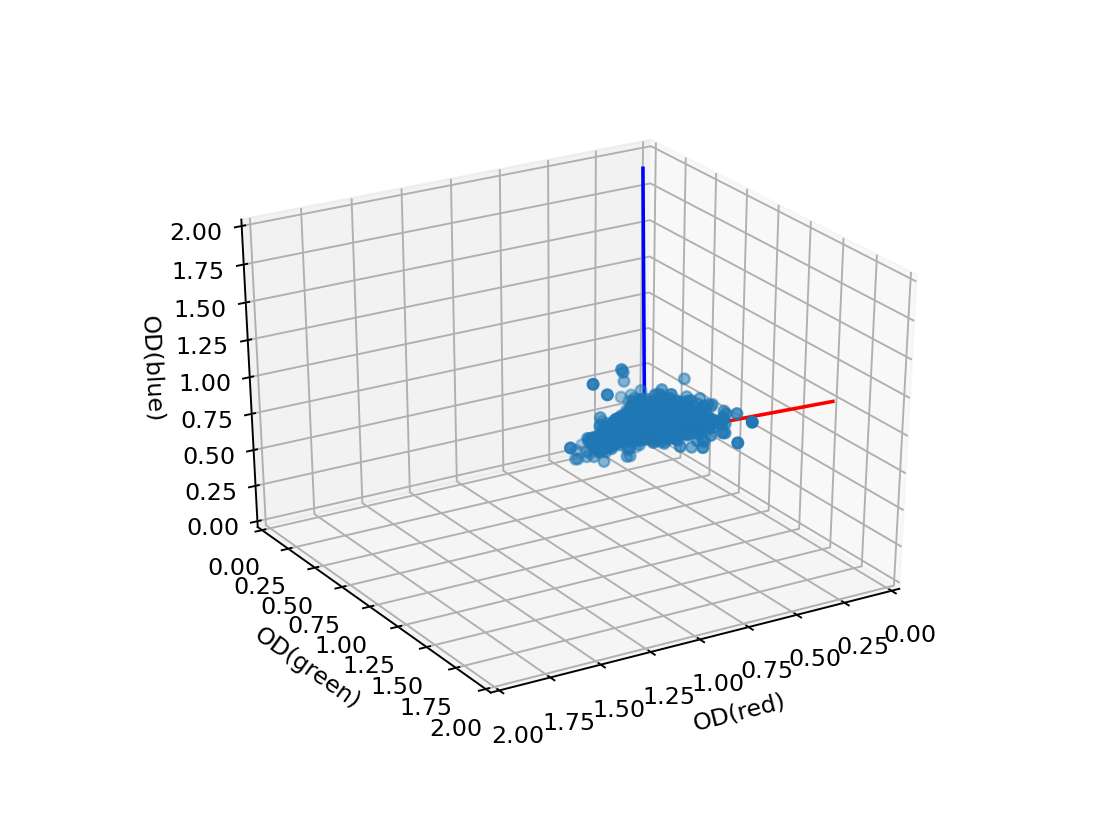

In [34]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ODhat[1:6000000:1000,0], ODhat[1:6000000:1000,1], ODhat[1:6000000:1000,2], zdir='z', s=20, c=None, depthshade=True)

ax.set(xlim=(0.0, 2.0), ylim=(0.0, 2.0), zlim=(0.0, 2.0))

ax.set_xlabel("OD(red)")
ax.set_ylabel("OD(green)")
ax.set_zlabel("OD(blue)")

ax.plot([0.0, vMin2[0]*4], [0.0, vMin2[1]*4],[0.0, vMin2[2]*4],'r-')
ax.plot([0.0, vMax2[0]*4], [0.0, vMax2[1]*4],[0.0, vMax2[2]*4],'b-')


In [11]:
array([[0.34352416],
        [0.53356421],
        [0.77285211]]))minPhi/(2*np.pi)*360.0, maxPhi/(2*np.pi)*360.0

(-116.79614454775773, -85.43689425503234)

In [20]:
vMin = eigvecs[:,1:3].dot(np.array([(np.cos(minPhi), np.sin(minPhi))]).T)
vMax = eigvecs[:,1:3].dot(np.array([(np.cos(maxPhi), np.sin(maxPhi))]).T)


<IPython.core.display.Javascript object>


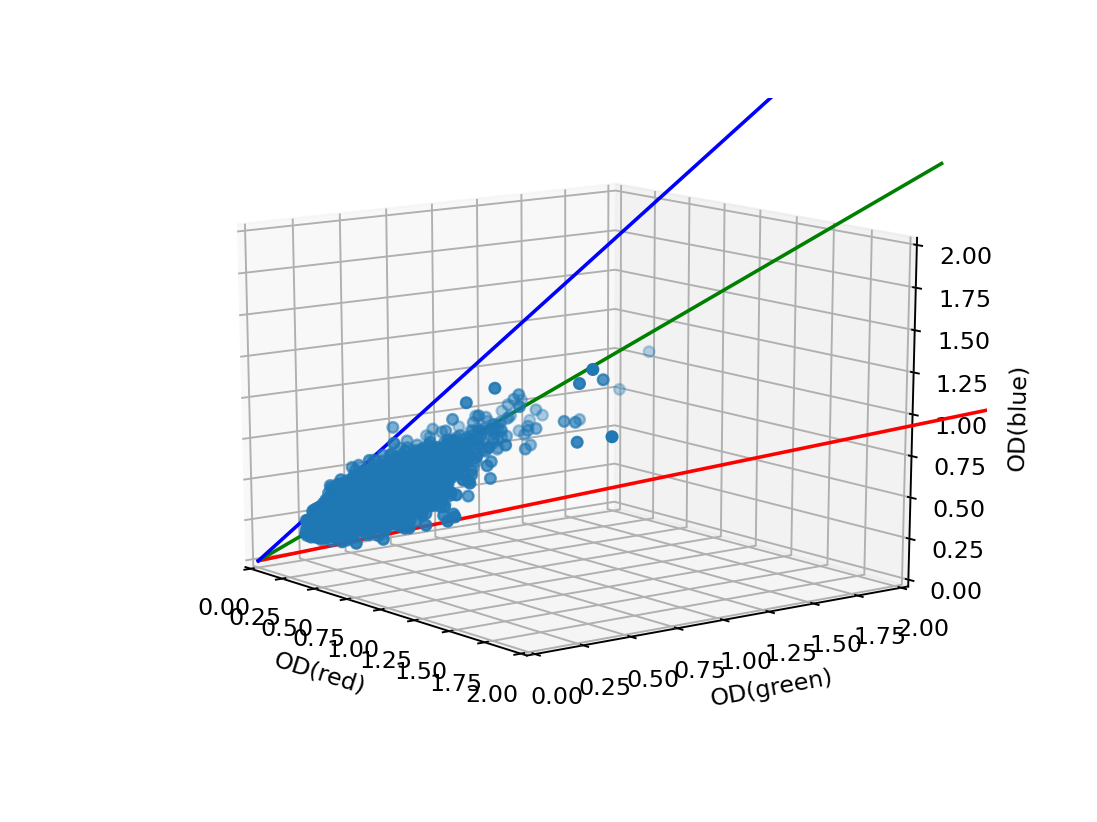

In [35]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ODhat[1:6000000:1000,0], ODhat[1:6000000:1000,1], ODhat[1:6000000:1000,2], zdir='z', s=20, c=None, depthshade=True)

ax.set(xlim=(0.0, 2.0), ylim=(0.0, 2.0), zlim=(0.0, 2.0))

ax.set_xlabel("OD(red)")
ax.set_ylabel("OD(green)")
ax.set_zlabel("OD(blue)")

ax.plot([0.0, vMin[0]*4], [0.0, vMin[1]*4],[0.0, vMin[2]*4],'r-')
ax.plot([0.0, vMax[0]*4], [0.0, vMax[1]*4],[0.0, vMax[2]*4],'g-')

ax.plot([0.0, vMax2[0]*4], [0.0, vMax2[1]*4],[0.0, vMax2[2]*4],'b-')

plt.show()

In [36]:
vMin, vMax, vMin2, vMax2

#HRDref = np.array([[0.651, 0.185, 0.269],
#                   [0.701, 0.78, 0.568],
#                   [0.29, 0.598, 0.778]])

(array([[0.67549234],
        [0.66978714],
        [0.30837523]]),
 array([[0.20938269],
        [0.81495249],
        [0.54038072]]),
 array([[0.28923141],
        [0.79556124],
        [0.5323791 ]]),
 array([[0.34352416],
        [0.53356421],
        [0.77285211]]))

In [14]:
# a heuristic to make the vector corresponding to hematoxylin first and the 
# one corresponding to red second
if vMin[0] > vMax[0]:
    HRD = np.array((vMin[:,0], vMax[:,0], eigvecs[:, 0])).T
else:
    HRD = np.array((vMax[:,0], vMin[:,0], eigvecs[:, 0])).T


In [15]:
# rows correspond to channels (RGB), columns to OD values
Y = np.reshape(OD, (-1, 3)).T

# determine concentrations of the individual stains
C = np.linalg.lstsq(HRD,Y, rcond=None)[0]


In [16]:
C

array([[0.21695345, 0.22248948, 0.15704375, ..., 0.22812651, 0.18948673,
        0.20977301],
       [0.20770522, 0.21088821, 0.24527448, ..., 0.19108665, 0.18303549,
        0.16501158],
       [0.1327164 , 0.13499302, 0.1503755 , ..., 0.1135819 , 0.10858852,
        0.10668127]])

In [17]:
# normalize stain concentrations
maxC = np.array([np.percentile(C[0,:], 99), np.percentile(C[1,:],99), np.percentile(C[2,:], 99)])
tmp = np.divide(maxC,maxCRef)
C2 = np.divide(C,tmp[:, np.newaxis])


In [18]:
# recreate the image using reference mixing matrix
Inorm = np.multiply(Io, np.exp(-HRDref.dot(C2)))
Inorm[Inorm>255] = 254
Inorm = np.reshape(Inorm.T, (h, w, 3)).astype(np.uint8)  

# unmix hematoxylin and eosin
H = np.multiply(Io, np.exp(np.expand_dims(-HRDref[:,0], axis=1).dot(np.expand_dims(C2[0,:], axis=0))))
H[H>255] = 254
H = np.reshape(H.T, (h, w, 3)).astype(np.uint8)

R = np.multiply(Io, np.exp(np.expand_dims(-HRDref[:,1], axis=1).dot(np.expand_dims(C2[1,:], axis=0))))
R[R>255] = 254
R = np.reshape(R.T, (h, w, 3)).astype(np.uint8)

D = np.multiply(Io, np.exp(np.expand_dims(-HRDref[:,2], axis=1).dot(np.expand_dims(C2[2,:], axis=0))))
D[D>255] = 254
D = np.reshape(D.T, (h, w, 3)).astype(np.uint8)


In [19]:
if saveFile is not None:
    Image.fromarray(Inorm).save(saveFile+'.png')
    Image.fromarray(H).save(saveFile+'_H.png')
    Image.fromarray(R).save(saveFile+'_R.png')
    Image.fromarray(D).save(saveFile+'_D.png')
